In [37]:
import pandas as pd
a=pd.read_csv('/content/chronic kidney disease.zip')
print(a)
print(a.head())
print(a.columns)
target_variable = 'Class'
features = a.columns[a.columns != target_variable]
print('Target Variable:', target_variable)
print('Features:',features)

       Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0    80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1    50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2    80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3    70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4    80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   
..    ...    ...  ...  ...  ...   ...  ...     ...   ...   ...     ...   ...   
395  80.0  1.020  0.0  0.0  1.0  49.0  0.5  150.00  4.90  15.7  6700.0  4.90   
396  70.0  1.025  0.0  0.0  1.0  31.0  1.2  141.00  3.50  16.5  7800.0  6.20   
397  80.0  1.020  0.0  0.0  1.0  26.0  0.6  137.00  4.40  15.8  6600.0  5.40   
398  60.0  1.025  0.0  0.0  1.0  50.0  1.0  135.00  4.90  14.2  7200.0  5.90   
399  80.0  1.025  0.0  0.0  1.0  18.0  1.1  141.00  3.50  15.8  6800.0  6.10   

     Htn  Class  
0    1.0      1  
1  

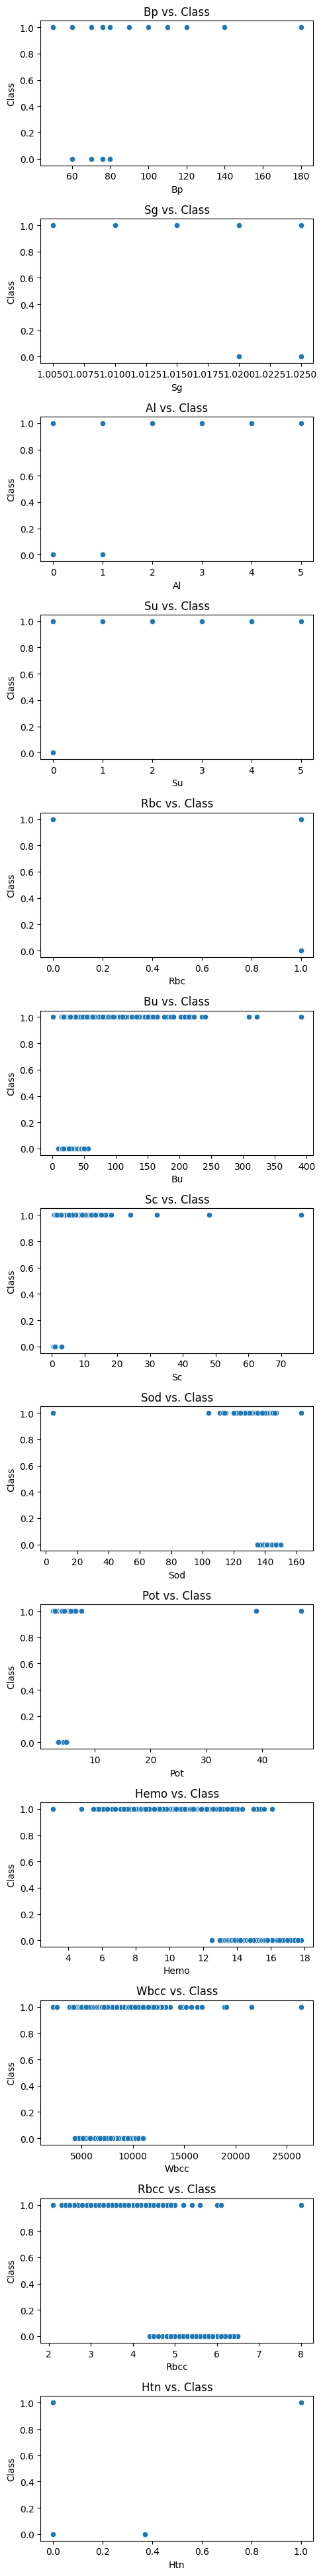

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
target_variable = 'Class'
feature_names = [col for col in a.columns if col != target_variable]
num_plots = len(feature_names)
fig, axes = plt.subplots(num_plots, 1, figsize=(5, 3*num_plots))
for i, feature in enumerate(feature_names):
    sns.scatterplot(data=a, x=feature, y=target_variable, ax=axes[i])
    axes[i].set_title(f'{feature} vs. {target_variable}')
plt.tight_layout()
plt.show()

In [39]:
y=a['Class']
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Class, Length: 400, dtype: int64

In [40]:
X=a.drop('Class',axis=1)
X

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.975


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       1.00      0.95      0.98        64

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [44]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[56  0]
 [ 3 61]]


In [45]:
correlation_matrix = a.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             Bp        Sg        Al        Su       Rbc        Bu        Sc  \
Bp     1.000000 -0.164057  0.146060  0.190277 -0.151478  0.184173  0.144469   
Sg    -0.164057  1.000000 -0.460835 -0.292053  0.253894 -0.249263 -0.176141   
Al     0.146060 -0.460835  1.000000  0.262564 -0.374484  0.405035  0.229396   
Su     0.190277 -0.292053  0.262564  1.000000 -0.092940  0.126074  0.094568   
Rbc   -0.151478  0.253894 -0.374484 -0.092940  1.000000 -0.236270 -0.138391   
Bu     0.184173 -0.249263  0.405035  0.126074 -0.236270  1.000000  0.581176   
Sc     0.144469 -0.176141  0.229396  0.094568 -0.138391  0.581176  1.000000   
Sod   -0.103383  0.217456 -0.270709 -0.053448  0.140568 -0.307357 -0.624493   
Pot    0.066791 -0.063450  0.114484  0.180098  0.018164  0.336954  0.205361   
Hemo  -0.279441  0.492103 -0.548681 -0.156875  0.280991 -0.540699 -0.342053   
Wbcc   0.025963 -0.206880  0.200664  0.159033 -0.002205  0.041530 -0.005420   
Rbcc  -0.220827  0.443437 -0.454

In [46]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [47]:
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
y_pred = perceptron_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5333333333333333


In [48]:
from sklearn.neighbors import KNeighborsClassifier
k_values = list(range(1, 21))
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

In [49]:
print(accuracies)

[0.675, 0.675, 0.6833333333333333, 0.7083333333333334, 0.7333333333333333, 0.7166666666666667, 0.7083333333333334, 0.6833333333333333, 0.6916666666666667, 0.6666666666666666, 0.6916666666666667, 0.6833333333333333, 0.675, 0.6666666666666666, 0.6583333333333333, 0.6583333333333333, 0.6416666666666667, 0.65, 0.6416666666666667, 0.6583333333333333]


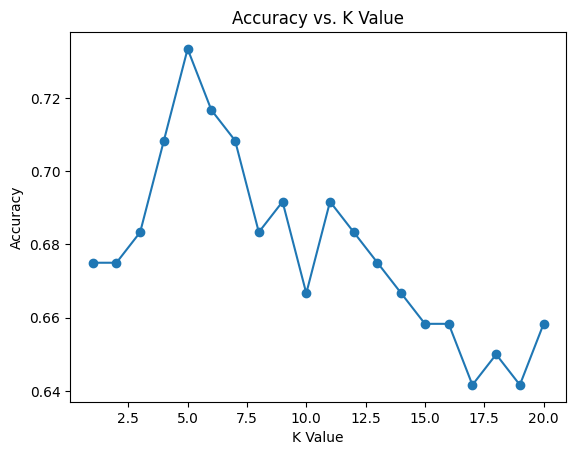

In [50]:
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975


In [52]:
import matplotlib.pyplot as plt
from sklearn.utils import resample
def bootstrap_accuracy(model, X_train, y_train, X_test, y_test, n_iterations):
    accuracies = []
    for i in range(n_iterations):
      X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
      model.fit(X_resampled, y_resampled)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      accuracies.append(accuracy)
    return accuracies

In [53]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Perceptron': Perceptron(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

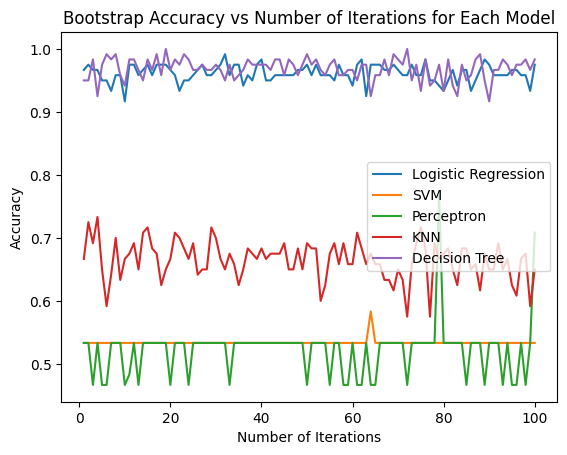

In [54]:
n_iterations = 100
for model_name, model in models.items():
    accuracies = bootstrap_accuracy(model, X_train, y_train, X_test, y_test, n_iterations)
    plt.plot(range(1, n_iterations + 1), accuracies, label=model_name)
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Bootstrap Accuracy vs Number of Iterations for Each Model')
plt.legend()
plt.show()